## Concrete Cracking Data Analysis
This colab analyzes the processed data from a finite element model (FEM) with corrosion pattern inputs. The inputs to this colab are the processed .npy files after running data generation and data preprocessing.

Data generation code: https://github.com/jmswong/concrete_corrosion/tree/main/data_generation

Data preprocessing code: https://github.com/jmswong/concrete_corrosion/tree/main/data_preprocessing

# Contents
- Example Corrosion Patterns
- Peak Corrosion Depths
- Concrete Property Distributions

In [44]:
# Imports
import copy
import random
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [45]:
# mount drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
# load processed dataset
corrosion_data = np.load('/content/drive/MyDrive/CS230/corrosion_train.npy', allow_pickle=True)
target_data = np.load('/content/drive/MyDrive/CS230/labels_train.npy', allow_pickle=False)
print("corrosion_data shape: ", corrosion_data.shape)
print("target_data shape: ", target_data.shape)

corrosion_data shape:  (1080, 343)
target_data shape:  (1080,)


# Example corrosion patterns

In [80]:
corrosion_data_positive = corrosion_data[target_data==1]
corrosion_data_negative = corrosion_data[target_data==0]

[Text(0, 0.5, 'corrosion depth')]

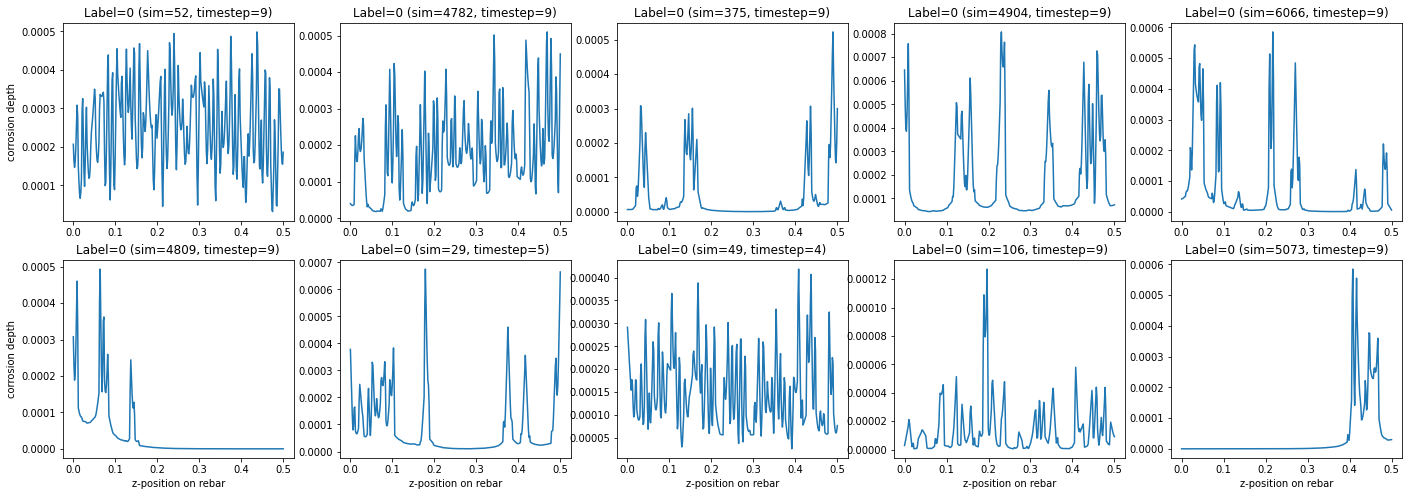

In [107]:
NUM_EXAMPLES = 5 # Number of examples to show
OFFSET = 140 # Change offset to see different examples
fig, axs = plt.subplots(2, NUM_EXAMPLES, figsize=(24,8))

for i in range(NUM_EXAMPLES):
  pos_sample = corrosion_data_positive[i+OFFSET]
  axs[0][i].plot(np.linspace(0, 0.5, 337), pos_sample[6:])
  axs[0][i].set_title("Label=0 (sim=%d, timestep=%d)" % (pos_sample[0], pos_sample[1]))
#axs[0][0].set(xlabel="z-position on rebar", ylabel="corrosion depth")

  neg_sample = corrosion_data_negative[i+OFFSET]
  axs[1][i].plot(np.linspace(0, 0.5, 337), neg_sample[6:])
  axs[1][i].set_title("Label=0 (sim=%d, timestep=%d)" % (neg_sample[0], neg_sample[1]))
  axs[1][i].set(xlabel="z-position on rebar")

axs[0][0].set(ylabel="corrosion depth")
axs[1][0].set(ylabel="corrosion depth")

# Peak Corrosion Depths

A natural indication of corrosion is the peak corrosion depth (maximum corrosion across the rebar). Below plots the peak distributions over both positive and negative samples.

Text(0.5, 1.0, 'Negative samples corrosion peaks')

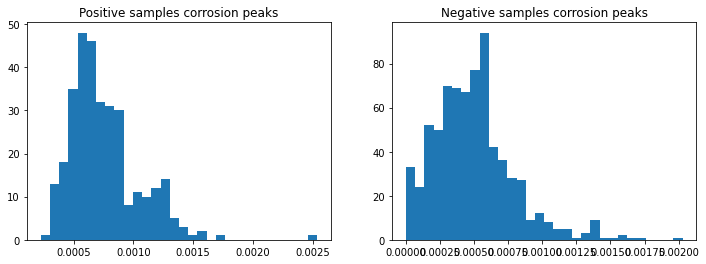

In [138]:
positive_peaks = np.max(corrosion_data_positive[:, 6:], axis=1)
negative_peaks = np.max(corrosion_data_negative[:, 6:], axis=1)
negative_peaks = [x for x in negative_peaks if x < 1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

ax1.hist(positive_peaks, bins=30)
ax1.set_title("Positive samples corrosion peaks")

ax2.hist(negative_peaks, bins=30)
ax2.set_title("Negative samples corrosion peaks")

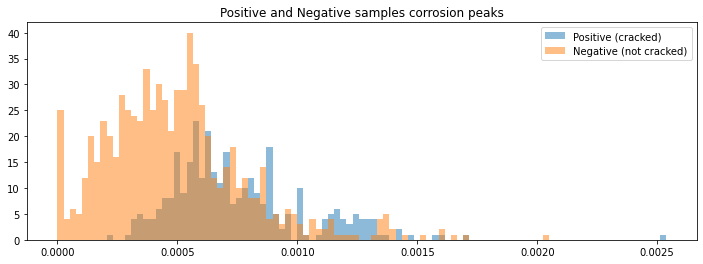

In [151]:
# Same as above, but on same graph
fig, ax = plt.subplots(figsize=(12,4))

bins = np.linspace(0, max(list(positive_peaks) + list(negative_peaks)), 100)

ax.hist(positive_peaks, bins, alpha=0.5, label="Positive (cracked)")

ax.hist(negative_peaks, bins, alpha=0.5, label="Negative (not cracked)")
ax.set_title("Positive and Negative samples corrosion peaks")

plt.legend()

In [124]:
# Examine some samples with abnormally high corrosion depths

print ("%10s %10s %10s" % ("max_depth", "simulation", "timestep"))
# filter to max_depth > 1
high_max_depth = [x for x in list(zip(negative_peaks, corrosion_data_negative[:, 0], corrosion_data_negative[:, 1])) if x[0] > 1]
# sort by simulation_idx and timestep
high_max_depth.sort(key=lambda x: (x[1], x[2]))
for x in high_max_depth:
  print ("%10f %10d %10d" % (x[0], x[1], x[2]))

 max_depth simulation   timestep
 11.580893         28          1
  3.939872         37          1
  3.746724         38          1
  9.701102         42          1
 10.517935       4726          1
 27.599223       4728          1
 14.301704       4729          1
  9.557731       4730          1
 18.720023       4732          1
 12.935053       4733          1
 18.959829       4734          1
 12.772770       4735          1
 14.461544       4736          1
  9.286539       4737          1
 13.754517       4739          1
  9.631133       4741          1
 13.863380       4742          1
 12.443549       4744          1
  9.888586       4745          1
 20.138205       4746          1
 13.595950       4747          1
 11.812639       4748          1
 13.159327       4749          1
 10.519470       4752          1
 10.667630       4753          1
 16.044868       4754          1
 10.457726       4755          1
 14.135929       4756          1
 14.635489       4757          1
 14.677023

# Concrete Property Distributions

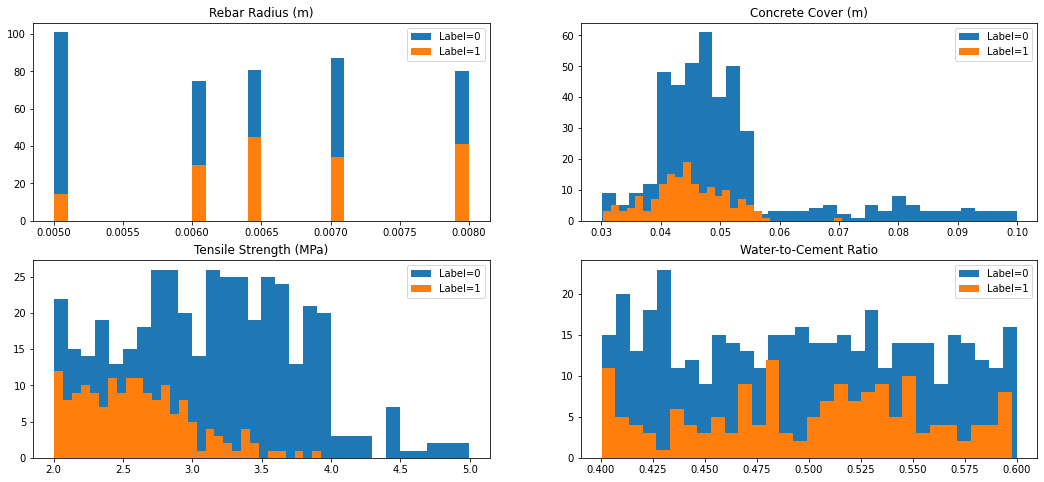

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(18, 8))
axs[0, 0].hist(corrosion_data_negative[:, 2], bins=30, label="Label=0")
axs[0, 0].hist(corrosion_data_positive[:, 2], bins=30, label="Label=1")
axs[0, 0].set_title('Rebar Radius (m)')
axs[0, 0].legend()
axs[0, 1].hist(corrosion_data_negative[:, 3], bins=30, label="Label=0")
axs[0, 1].hist(corrosion_data_positive[:, 3], bins=30, label="Label=1")
axs[0, 1].set_title('Concrete Cover (m)')
axs[0, 1].legend()
axs[1, 0].hist(corrosion_data_negative[:, 4], bins=30, label="Label=0")
axs[1, 0].hist(corrosion_data_positive[:, 4], bins=30, label="Label=1")
axs[1, 0].set_title('Tensile Strength (MPa)')
axs[1, 0].legend()
axs[1, 1].hist(corrosion_data_negative[:, 5], bins=30, label="Label=0")
axs[1, 1].hist(corrosion_data_positive[:, 5], bins=30, label="Label=1")
axs[1, 1].set_title('Water-to-Cement Ratio')
axs[1, 1].legend()